<a href="https://colab.research.google.com/github/honggi82/Software_application_lecture/blob/main/cnn_custom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 설치

In [ ]:
!pip install tensorflow
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 576.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 6.9 MB/s eta 0:00:00


# 구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 라이브러리 가져오기

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

# Training 데이터셋 불러오기
"http://content/gdrive/MyDrive/software/"는 데이터셋이 있는 폴더 위치로 다른 경우 변경해야 함.
각 사진 파일은 "face숫자_숫자.jpg"란 이름으로 저장되어 있으며, 앞의 숫자는 class를 뒤의 숫자는 몇 번째 데이터인지를 나타내는 숫자임.
아래 코드는 class가 0, 1, 2가 있으며, 데이터가 100개 있는 경우에 대한 코드임.

In [ ]:
train_X=[]; test_X=[]; train_Y=[]; test_Y=[];

for i in range(0,100): # 데이터셋 100개를 training 용으로 읽어오는 코드
    img=cv2.imread("/content/gdrive/MyDrive/software/face0_"+str(i)+".jpg")
    train_X.append(cv2.resize(img,(50,50))) # 사진 크기를 50*50으로 변경해주는 코드
    train_Y.append(0)
    img=cv2.imread("/content/gdrive/MyDrive/software/face1_"+str(i)+".jpg")
    train_X.append(cv2.resize(img,(50,50)))
    train_Y.append(1)
    img=cv2.imread("/content/gdrive/MyDrive/software/face2_"+str(i)+".jpg")
    train_X.append(cv2.resize(img,(50,50)))
    train_Y.append(2)

# 데이터를 numpy array로 변경

In [ ]:
train_X=np.array(train_X)
train_Y=np.array(train_Y)

# 샘플 테이터 그려보기

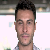

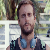

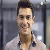

0
1
2


In [ ]:
cv2_imshow(train_X[0]); cv2_imshow(train_X[1]); cv2_imshow(train_X[2]);
print(train_Y[0]); print(train_Y[1]); print(train_Y[2]);

# Test 데이터셋 불러오기

In [ ]:
for i in range(100,200):
    img=cv2.imread("/content/gdrive/MyDrive/software/face0_"+str(i)+".jpg")
    test_X.append(cv2.resize(img,(50,50)))
    test_Y.append(0)
    img=cv2.imread("/content/gdrive/MyDrive/software/face1_"+str(i)+".jpg")
    test_X.append(cv2.resize(img,(50,50)))
    test_Y.append(1)
    img=cv2.imread("/content/gdrive/MyDrive/software/face2_"+str(i)+".jpg")
    test_X.append(cv2.resize(img,(50,50)))
    test_Y.append(2)

# 데이터를 numpy array로 변경

In [ ]:
test_X=np.array(test_X)
test_Y=np.array(test_Y)

# 샘플 테이터 그려보기

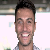

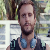

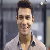

0
1
2


In [ ]:
cv2_imshow(test_X[0]); cv2_imshow(test_X[1]); cv2_imshow(test_X[2]);
print(test_Y[0]); print(test_Y[1]); print(test_Y[2]);

# 데이터 정규화

In [ ]:
train_X = train_X.astype('float32')/255.0
test_X = test_X.astype('float32')/255.0

# One-Hot Encoding

In [ ]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

# CNN 모델 생성

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', strides=(1,1), activation='relu', input_shape=(50,50,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), padding='same', strides=(1,1), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(3, activation='softmax')])
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        27,651 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,043 (183.76 KB)

 Trainable params: 47,043 (183.76 KB)

 Non-trainable params: 0 (0.00 B)

# Training

In [ ]:
history=model.fit(train_X, train_Y, batch_size=8, epochs=5)

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8407 - loss: 0.4692
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 1.3034e-04
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 2.1378e-05
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 1.8955e-05
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 1.6273e-05


# Test

In [ ]:
_, accuracy = model.evaluate(test_X, test_Y)
print('Accuracy: ', accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 4.0884e-05
Accuracy:  1.0


# Loss 그리기

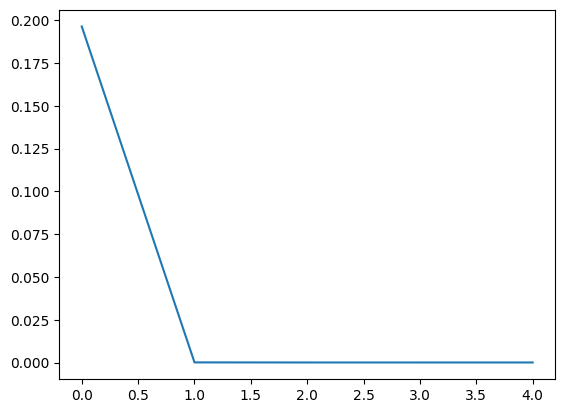

In [ ]:
plt.plot(history.history['loss'], label='loss')

# n번째 데이터 예측 후 실제 값과 비교

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


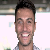

Prediction: [9.9998087e-01 1.8371467e-05 7.7426171e-07]
Real: [1. 0. 0.]


In [ ]:
trial=0
pred=model.predict(test_X)
cv2_imshow(test_X[trial]*255);
print("Prediction: " + str(pred[trial]))
print("Real: " + str(test_Y[trial]))

In [ ]:
from tensorflow.keras.models import load_model
# 생성했던 모델을 저장
model.save("/content/gdrive/MyDrive/software/my_model.keras")

In [ ]:
# 저장된 모델을 불러옴
model = load_model("/content/gdrive/MyDrive/software/my_model.keras")
# 저장된 모델로 예측
model.predict(test_X)

 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[9.99980867e-01, 1.83714674e-05, 7.74261707e-07],
       [1.85221870e-05, 9.99980271e-01, 1.20798472e-06],
       [4.14248871e-06, 1.75670675e-06, 9.99994099e-01],
       [9.99980509e-01, 1.86366706e-05, 7.80150970e-07],
       [1.91028630e-05, 9.99979675e-01, 1.25001259e-06],
       [4.13883981e-06, 1.75856735e-06, 9.99994099e-01],
       [9.99980390e-01, 1.86994075e-05, 7.75332751e-07],
       [1.96872588e-05, 9.99978960e-01, 1.26303598e-06],
       [4.23420579e-06, 1.79281039e-06, 9.99993861e-01],
       [9.99980271e-01, 1.88815775e-05, 7.82159987e-07],
       [1.97504414e-05, 9.99978840e-01, 1.27439603e-06],
       [4.30122100e-06, 1.81902271e-06, 9.99993861e-01],
       [9.99980152e-01, 1.90096780e-05, 7.94480911e-07],
       [2.07848261e-05, 9.99977887e-01, 1.33082199e-06],
       [4.39349787e-06, 1.86320381e-06, 9.99993742e-01],
       [9.99980032e-01, 1.90280662e-05, 7.95952019e-07],
       [2.07876401e-05, 9.99977887e-01, 1.33161416e-06],
       [4.53584971e-06, 1.91144